# Notebook for Part 3 - Regression

In [1]:
# Import Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt

# Import Pandas and NumPy functionality for editing data
import pandas as pd
import seaborn as sns

# Importing IPython display for visualizing intermediate results in the notebook
from IPython.display import display

# Import Regression
from sklearn.linear_model import LogisticRegression

## 3.a) Question: Create a logistic regression model and give weights

In [3]:
# Load train and test dataset from disk
train_dataset = pd.read_csv('train_dataset.csv')
test_dataset = pd.read_csv('test-dataset-oh.csv')

In [5]:
train_dataset.head()

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,num
0,61,150.00,243.0,137.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,49,140.00,187.0,172.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,61,140.18,0.0,86.0,1.5,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3
3,60,117.00,230.0,160.0,1.4,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
4,59,128.82,0.0,128.0,2.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2


In [7]:
regression_data = train_dataset[['age', 'thalch', 'num']].copy()
regression_data.head()

,age,thalch,num
0,61,137.0,0
1,49,172.0,0
2,61,86.0,3
3,60,160.0,2
4,59,128.0,2


In [8]:
descriptive_features = train_dataset[['age', 'thalch']]
target_feature = train_dataset['num']
descriptive_features.head()

,age,thalch
0,61,137.0
1,49,172.0
2,61,86.0
3,60,160.0
4,59,128.0


In [9]:
# Create a logistic regression model
lrc = LogisticRegression(multi_class='ovr')
lrc.fit(descriptive_features, target_feature)

/opt/conda/envs/env-ids/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [11]:
target_feature_predict = lrc.predict(descriptive_features)

In [17]:
# .coef_ returns the weight and .intercept_ the intercept
print('Weights:')
print(lrc.coef_)
print('\nIntercept: \n', lrc.intercept_)

Weights:
[[-0.03595986  0.03282182]
 [-0.01361616 -0.01513819]
 [ 0.04444063 -0.01085738]
 [ 0.05601142 -0.02683136]
 [ 0.09108474 -0.01093397]]

Intercept: 
 [-2.76868524  1.8326611  -3.02219145 -1.70964226 -7.46803626]


## 3.b) Question: Compute error

In [23]:
from sklearn.metrics import accuracy_score, mean_squared_error

# Split the test data set in descriptive and target features
y_descriptive, y_target = test_dataset[['age', 'thalch']].copy(), test_dataset[ 'num'].copy()

# Predicting the target value
prediction = lrc.predict(y_descriptive)

# Print the values
print(f"Mean Squared Error {mean_squared_error(y_target, prediction)}")
print(f"Accuracy Score {accuracy_score(y_target, prediction)}")


Mean Squared Error 2.260869565217391
Accuracy Score 0.5217391304347826


## 3.c) Question: Plot thalch over age

In [26]:
df = test_dataset[['age', 'thalch', 'num']].copy()
ax.scatter(df['thalch'], df['age'], c=df['color'].map(colors))
df.head()

,age,thalch,num
0,67,125.0,2
1,55,134.0,0
2,44,100.0,1
3,67,172.0,0
4,68,150.0,3


In [29]:
df.columns

Index(['age', 'thalch', 'num'], dtype='object')

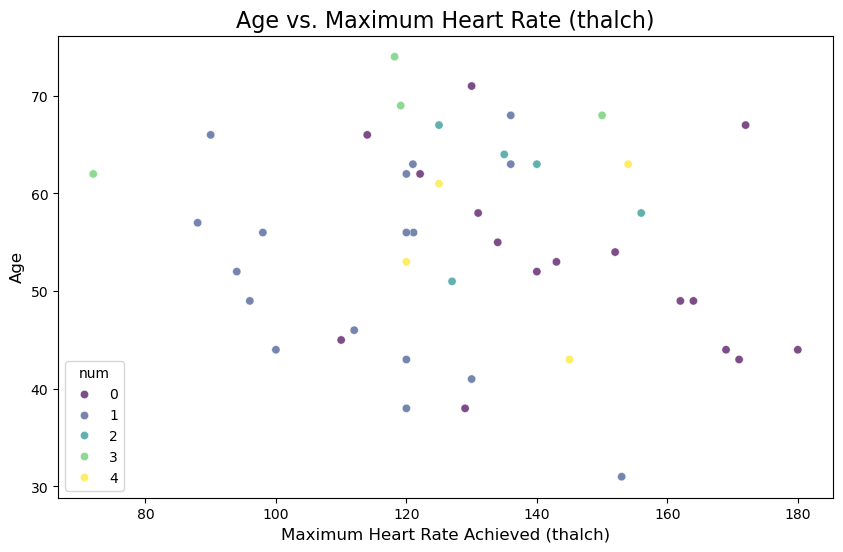

In [45]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=df,
    x='thalch',
    y='age',
    hue='num',
    palette='viridis',
    alpha=0.7
)

plt.title('Age vs. Maximum Heart Rate (thalch)', fontsize=16)
plt.xlabel('Maximum Heart Rate Achieved (thalch)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='num', loc='lower left')

plt.show()